In [155]:
%matplotlib inline

In [156]:
import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [157]:
experiments = pd.read_csv('../evaluation/resources/2020/all_experiments.csv')  
experiments = experiments.fillna('-')


In [95]:
eel[eel.ranker =='relevance_ranker']

,diff_mean,disp_mean,rel_mean,ranker,source,group,subgroup,theta,hfunc,augmentation,val_metric,feature_method,num_features,balancing_factor,ranker_config
3362,0.861910,2.029528,1.130407,relevance_ranker,META_train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,relevance_ranker_train_90_10_split_META_train
3363,0.982013,2.155315,1.133250,relevance_ranker,TEXT_train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,relevance_ranker_train_90_10_split_TEXT_train


In [158]:
experiments.head()

,difference,disparity,relevance,difference_ind,disparity_ind,relevance_ind,util,qid,ranker,source,group,subgroup,theta,hfunc,augmentation,val_metric,feature_method,num_features,balancing_factor
0,0.093994,1.764305,1.391840,0.505467,0.187961,0.061738,0.128527,3462,ac,lambdamart_err_mpt_10_0.1,author,ind,99.0,linear,-,-,-,-,-
1,0.458239,1.349019,0.890975,0.861252,0.504215,0.212971,0.214348,8940,ac,lambdamart_err_mpt_10_0.1,author,ind,99.0,linear,-,-,-,-,-
2,0.211752,2.205880,1.601764,0.376448,0.200894,0.089654,0.230992,10795,ac,lambdamart_err_mpt_10_0.1,author,ind,99.0,linear,-,-,-,-,-
3,0.203045,1.059265,0.758689,0.269296,0.187771,0.040046,0.225679,12073,ac,lambdamart_err_mpt_10_0.1,author,ind,99.0,linear,-,-,-,-,-
4,0.119569,1.875785,1.744386,0.803781,0.281360,0.129826,0.132375,12096,ac,lambdamart_err_mpt_10_0.1,author,ind,99.0,linear,-,-,-,-,-


In [98]:
eel_ind.head()

,diff_mean,disp_mean,rel_mean,ranker,source,group,subgroup,theta,hfunc,augmentation,val_metric,feature_method,num_features,balancing_factor,ranker_config
0,0.531691,0.288303,0.155978,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,99.0,linear,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_99...
1,0.531691,0.288303,0.155978,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,99.0,max,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_99...
2,0.511340,0.271792,0.157899,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,99.0,min,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_99...
3,0.478305,0.222629,0.149834,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,9.0,linear,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_9_...
4,0.483687,0.225270,0.148464,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,9.0,max,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_9_max


In [99]:
util.head()

,util_mean,ranker,source,group,subgroup,theta,hfunc,augmentation,val_metric,feature_method,num_features,balancing_factor,ranker_config
0,0.244917,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,99.0,linear,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_99...
1,0.244917,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,99.0,max,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_99...
2,0.259818,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,99.0,min,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_99...
3,0.240399,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,9.0,linear,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_9_...
4,0.238634,ac,lm_mrfr_err_aug0.5_mpt_10_0.1,author,ind,9.0,max,NaN,NaN,NaN,NaN,NaN,ac_lm_mrfr_err_aug0.5_mpt_10_0.1_author_ind_9_max


In [100]:
experiments = pd.merge(pd.merge(eel.rename({'diff_mean':'diff_mean_eel','rel_mean':'rel_mean_eel','disp_mean':'disp_mean_eel'},axis=1),
        eel_ind.rename({'diff_mean':'diff_mean_eel_ind','rel_mean':'rel_mean_eel_ind','disp_mean':'disp_mean_eel_ind'},axis=1), 
         on = ['ranker','source','group','subgroup','theta','hfunc','augmentation','val_metric','feature_method','num_features','balancing_factor','ranker_config']),
         util,
         on = ['ranker','source','group','subgroup','theta','hfunc','augmentation','val_metric','feature_method','num_features','balancing_factor','ranker_config'])[
    ['diff_mean_eel','disp_mean_eel','rel_mean_eel','diff_mean_eel_ind','disp_mean_eel_ind','rel_mean_eel_ind','util_mean','ranker','source','group','subgroup','theta','hfunc','augmentation','val_metric','feature_method','num_features','balancing_factor','ranker_config']]
experiments = experiments.fillna('-')
 

## Is the LM baseline improved by accuracy-oriented changes?

### Select LambdaMart data

In [159]:
lambdata = experiments[experiments.ranker == 'lambdamart']
lambdata = lambdata.reset_index(drop=True)
lambdata.head()

,difference,disparity,relevance,difference_ind,disparity_ind,relevance_ind,util,qid,ranker,source,group,subgroup,theta,hfunc,augmentation,val_metric,feature_method,num_features,balancing_factor
0,0.211684,1.964629,1.433157,1.686451,1.329427,0.041978,0.087503,3462,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10,0.1
1,1.071827,2.173456,0.996399,1.904734,1.329427,0.103836,0.087910,8940,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10,0.1
2,0.698335,3.454949,1.983007,1.538637,1.317708,0.066966,0.175418,10795,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10,0.1
3,0.809104,1.659759,0.755906,1.460666,1.329427,0.015189,0.087618,12073,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10,0.1
4,0.246748,2.390579,1.938194,2.079445,1.333318,0.017973,0.005475,12096,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10,0.1


### Visualize relations

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm



#### eel_diff

<AxesSubplot:xlabel='feature_method', ylabel='util'>

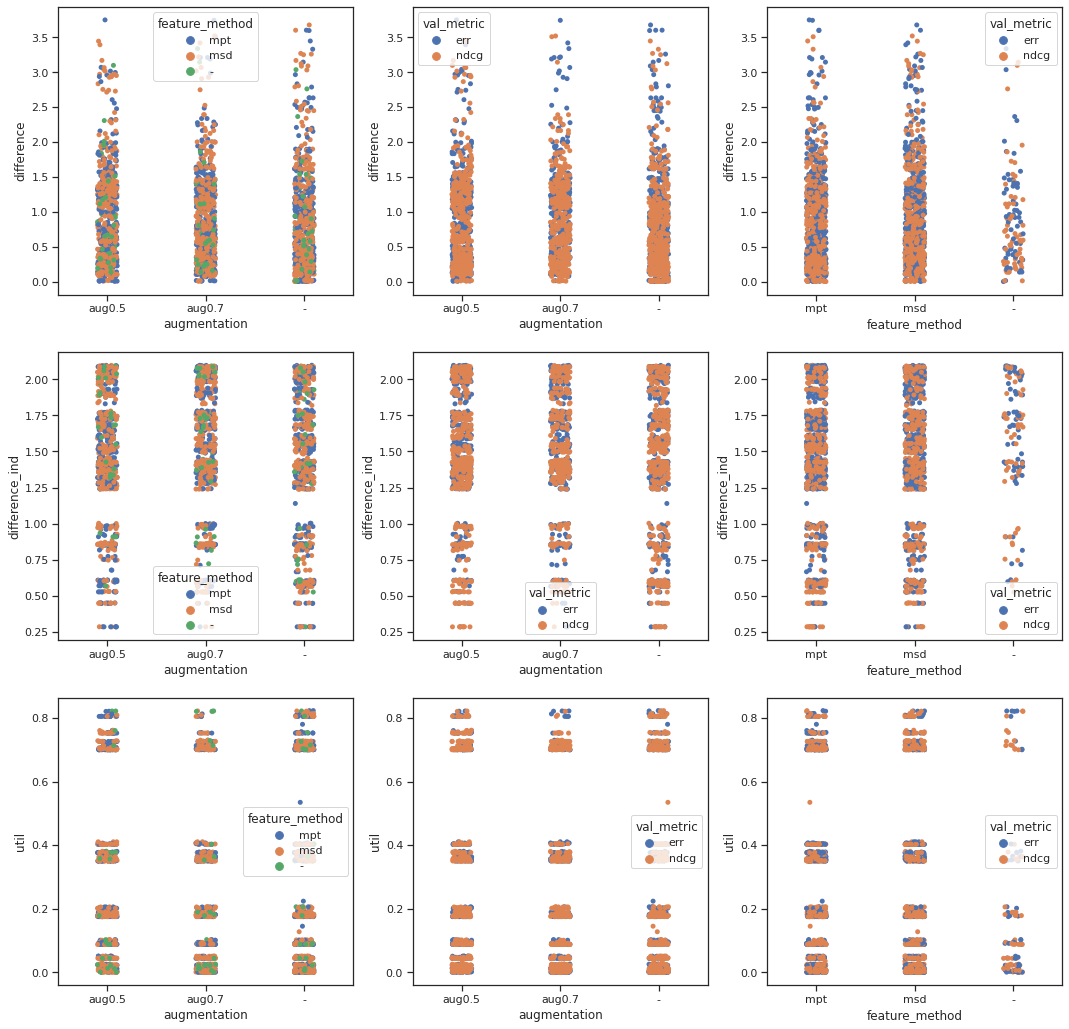

In [163]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))
sns.stripplot(x='augmentation',y='difference',hue='feature_method',data=lambdata, ax=axs[0][0])
sns.stripplot(x='augmentation',y='difference',hue='val_metric',data=lambdata, ax=axs[0][1])
sns.stripplot(x='feature_method',y='difference',hue='val_metric',data=lambdata, ax=axs[0][2])

sns.stripplot(x='augmentation',y='difference_ind',hue='feature_method',data=lambdata, ax=axs[1][0])
sns.stripplot(x='augmentation',y='difference_ind',hue='val_metric',data=lambdata, ax=axs[1][1])
sns.stripplot(x='feature_method',y='difference_ind',hue='val_metric',data=lambdata, ax=axs[1][2])


sns.stripplot(x='augmentation',y='util',hue='feature_method',data=lambdata, ax=axs[2][0])
sns.stripplot(x='augmentation',y='util',hue='val_metric',data=lambdata, ax=axs[2][1])
sns.stripplot(x='feature_method',y='util',hue='val_metric',data=lambdata, ax=axs[2][2])


#### disp_eel

<AxesSubplot:xlabel='feature_method', ylabel='util_mean'>

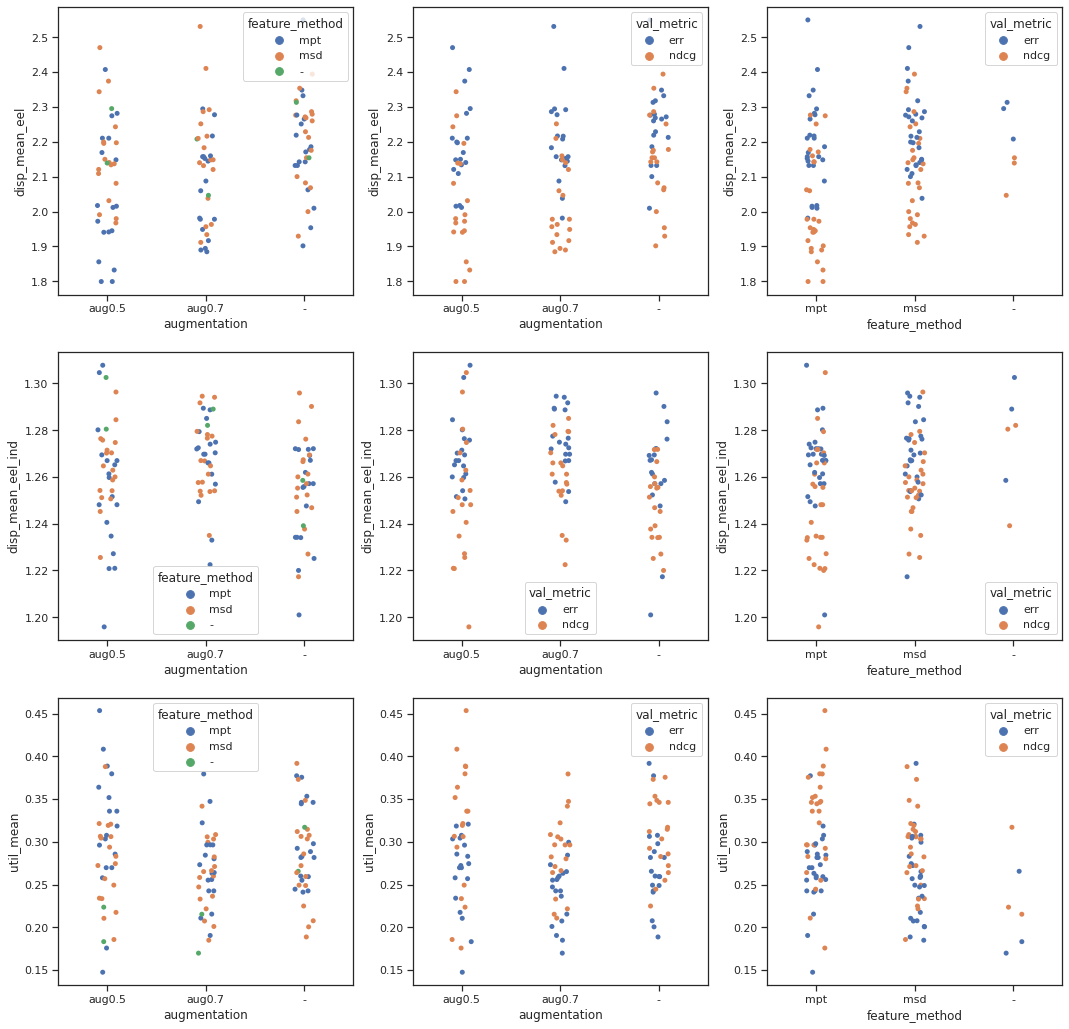

In [104]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))
sns.stripplot(x='augmentation',y='disp_mean_eel',hue='feature_method',data=lambdata, ax=axs[0][0])
sns.stripplot(x='augmentation',y='disp_mean_eel',hue='val_metric',data=lambdata, ax=axs[0][1])
sns.stripplot(x='feature_method',y='disp_mean_eel',hue='val_metric',data=lambdata, ax=axs[0][2])

sns.stripplot(x='augmentation',y='disp_mean_eel_ind',hue='feature_method',data=lambdata, ax=axs[1][0])
sns.stripplot(x='augmentation',y='disp_mean_eel_ind',hue='val_metric',data=lambdata, ax=axs[1][1])
sns.stripplot(x='feature_method',y='disp_mean_eel_ind',hue='val_metric',data=lambdata, ax=axs[1][2])


sns.stripplot(x='augmentation',y='util_mean',hue='feature_method',data=lambdata, ax=axs[2][0])
sns.stripplot(x='augmentation',y='util_mean',hue='val_metric',data=lambdata, ax=axs[2][1])
sns.stripplot(x='feature_method',y='util_mean',hue='val_metric',data=lambdata, ax=axs[2][2])


### Interaction plots

In [105]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

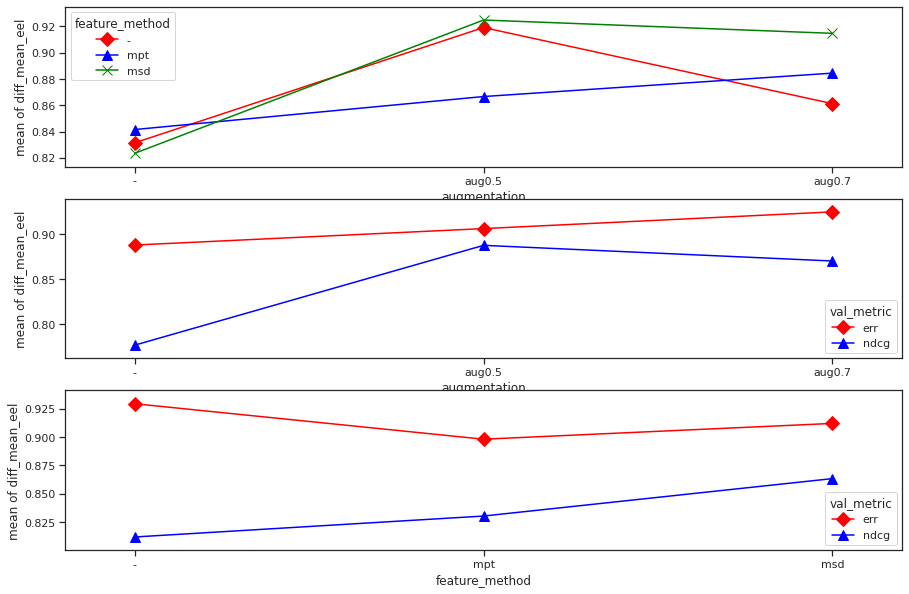

In [106]:
fig, ax = plt.subplots(3,1,figsize=(15,10))
ax[0] = interaction_plot(lambdata.augmentation, lambdata.feature_method, lambdata.diff_mean_eel,
             colors=['red','blue','green'], markers=['D','^','x'], ms=10, ax=ax[0])
ax[1] = interaction_plot(lambdata.augmentation, lambdata.val_metric, lambdata.diff_mean_eel,
             colors=['red','blue'], markers=['D','^'], ms=10, ax=ax[1])
ax[2] = interaction_plot(lambdata.feature_method, lambdata.val_metric, lambdata.diff_mean_eel,
             colors=['red','blue'], markers=['D','^'], ms=10, ax=ax[2])

### Homogeneity test

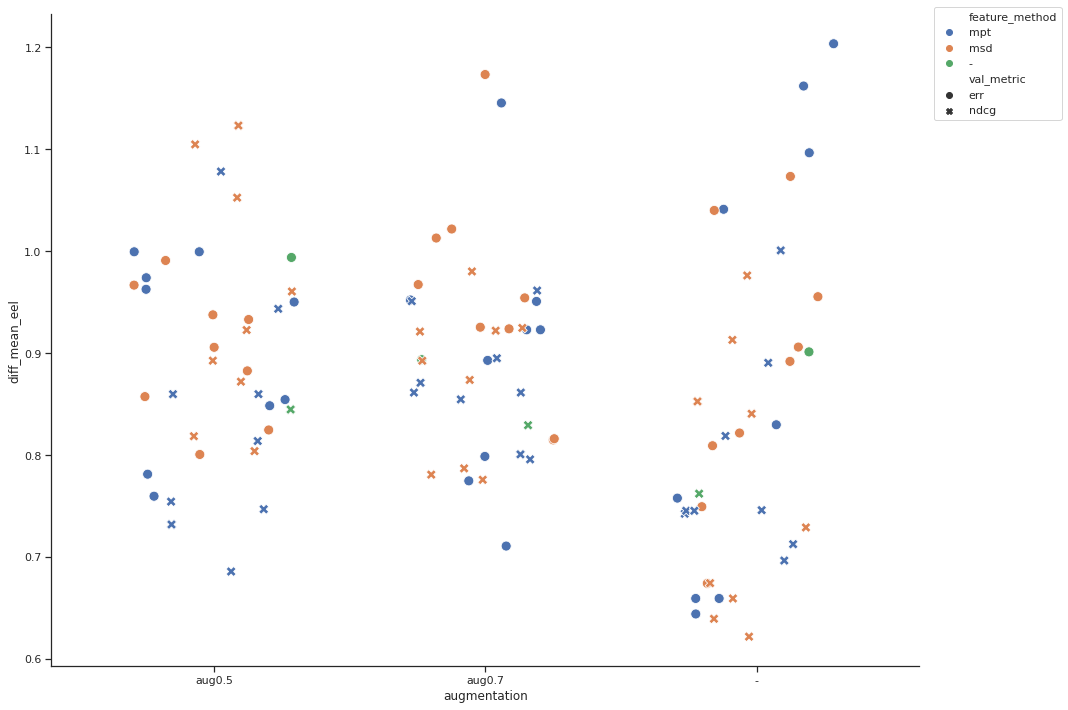

In [97]:
import numpy as np

jitter = 0.3

fig,ax = plt.subplots(1,1,figsize=(15,10))

sns.scatterplot(x='augmentation',y='diff_mean_eel',hue='feature_method', style='val_metric',data=lambdata,s=100, ax=ax)
for points in ax.collections:
    vertices = points.get_offsets().data
    if len(vertices) > 0:
        vertices[:, 0] += np.random.uniform(-1 * jitter, jitter, vertices.shape[0])
        points.set_offsets(vertices)
xticks = ax.get_xticks()
ax.set_xlim(xticks[0] - 2*jitter, xticks[-1] + 2*jitter) # the limits need to be moved to show all the jittered dots
sns.move_legend(ax, bbox_to_anchor=(1.01, 1.02), loc='upper left')  # needs seaborn 0.11.2
sns.despine()
plt.tight_layout()
plt.show()

In [107]:
stats.levene(
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'ndcg')],
             
            )

LeveneResult(statistic=2.2266689161928643, pvalue=0.007687493371510872)

Homogeneity is violated.

### ANOVA of all main factors and interactions

None of the interactions are significant!

In [108]:
formula = "diff_mean_eel ~ C(augmentation) + C(feature_method) + C(val_metric) + C(augmentation):C(feature_method) + C(feature_method):C(val_metric) + C(augmentation):C(val_metric) + C(augmentation):C(feature_method):C(val_metric)"
lm = ols(formula, lambdata).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          diff_mean_eel   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.409
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.149
Time:                        14:15:28   Log-Likelihood:                 88.548
No. Observations:                 114   AIC:                            -141.1
Df Residuals:                      96   BIC:                            -91.84
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    0.9011      0.121      7.431      0.000       0.660       1.142
C(augmentation)[T.aug0.5]                                                    0.0927      0.171      0.540      0.590      -0.248       0.433
C(augmentation)[T.aug0.7]                                                   -0.0077      0.171     -0.045      0.964      -0.348       0.333
C(feature_method)[T.mpt]                                                    -0.0064      0.128     -0.050      0.960      -0.260       0.247
C(feature_method)[T.msd]                                                    -0.0212      0.128     -0.166      0.869      -0.275       0.233
C(val_metric)[T.ndcg]                                                       -0.1392      0.171     -0.812      0.419      -0.480       0.201
C(augmentation)[T.aug0.5]:C(feature_method)[T.mpt]                          -0.0843      0.181     -0.466      0.642      -0.443       0.275
C(augmentation)[T.aug0.7]:C(feature_method)[T.mpt]                           0.0096      0.181      0.053      0.958      -0.349       0.368
C(augmentation)[T.aug0.5]:C(feature_method)[T.msd]                          -0.0729      0.181     -0.403      0.688      -0.432       0.286
C(augmentation)[T.aug0.7]:C(feature_method)[T.msd]                           0.0843      0.181      0.466      0.642      -0.275       0.443
C(feature_method)[T.mpt]:C(val_metric)[T.ndcg]                               0.0330      0.181      0.183      0.856      -0.326       0.392
C(feature_method)[T.msd]:C(val_metric)[T.ndcg]                               0.0264      0.181      0.146      0.884      -0.332       0.385
C(augmentation)[T.aug0.5]:C(val_metric)[T.ndcg]                             -0.0100      0.243     -0.041      0.967      -0.491       0.471
C(augmentation)[T.aug0.7]:C(val_metric)[T.ndcg]                              0.0749      0.243      0.309      0.758      -0.407       0.556
C(augmentation)[T.aug0.5]:C(feature_method)[T.mpt]:C(val_metric)[T.ndcg]     0.0434      0.256      0.170      0.866      -0.464       0.551
C(augmentation)[T.aug0.7]:C(feature_method)[T.mpt]:C(val_metric)[T.ndcg]     0.0070      0.256      0.027      0.978      -0.501       0.514
C(augmentation)[T.aug0.5]:C(feature_method)[T.msd]:C(val_metric)[T.ndcg]     0.1731      0.256      0.677      0.500      -0.334       0.681
C(augmentation)[T.aug0.7]:C(feature_method)[T.msd]:C(val_metric)[T.ndcg]    -0.0457      0.256     -0.179      0.859      -0.553       0.462
==============================================================================
Omnibus:                        2.624   Dur

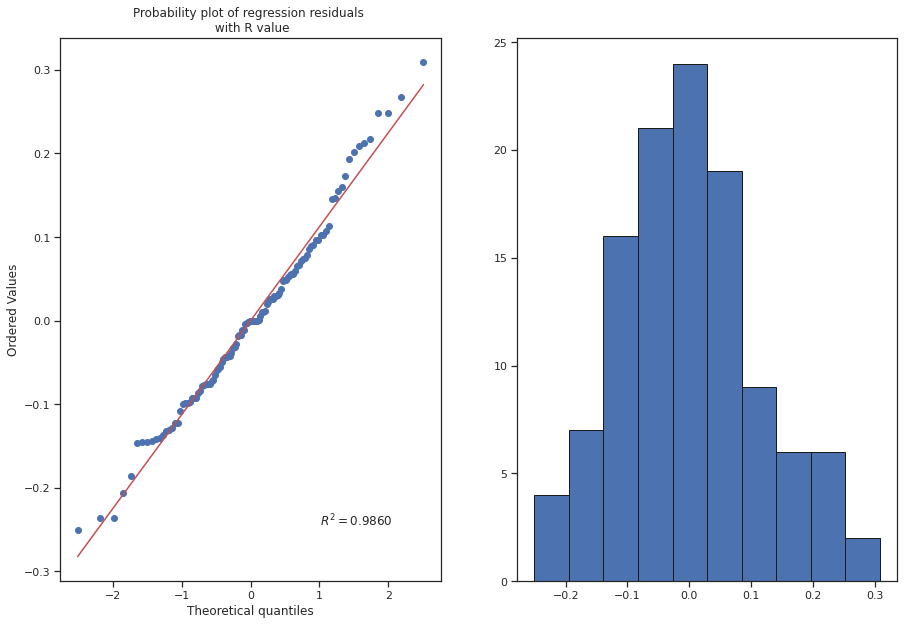

In [109]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf


fig = plt.figure(figsize= (15, 10))
ax = fig.add_subplot(121)


normality_plot, stat = stats.probplot(lm.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of regression residuals \n with R value")
ax.set

ax2 = fig.add_subplot(122)
plt.hist(lm.resid, bins='auto', histtype='bar', ec='k') 

plt.show()

### ANOVA of main factors and sub-interactions

In [110]:
formula = "diff_mean_eel ~ C(augmentation) + C(feature_method) + C(val_metric)+ C(augmentation):C(feature_method) + C(feature_method):C(val_metric) + C(augmentation):C(val_metric)"
lm = ols(formula, lambdata).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          diff_mean_eel   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.628
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0898
Time:                        14:15:29   Log-Likelihood:                 86.794
No. Observations:                 114   AIC:                            -145.6
Df Residuals:                     100   BIC:                            -107.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.9152      0.100      9.169      0.000       0.717       1.113
C(augmentation)[T.aug0.5]                              0.0414      0.124      0.335      0.739      -0.204       0.287
C(augmentation)[T.aug0.7]                              0.0015      0.124      0.012      0.990      -0.244       0.247
C(feature_method)[T.mpt]                              -0.0148      0.104     -0.143      0.887      -0.221       0.191
C(feature_method)[T.msd]                              -0.0424      0.104     -0.408      0.684      -0.248       0.164
C(val_metric)[T.ndcg]                                 -0.1673      0.104     -1.615      0.109      -0.373       0.038
C(augmentation)[T.aug0.5]:C(feature_method)[T.mpt]    -0.0626      0.127     -0.492      0.624      -0.315       0.190
C(augmentation)[T.aug0.7]:C(feature_method)[T.mpt]     0.0131      0.127      0.103      0.918      -0.239       0.265
C(augmentation)[T.aug0.5]:C(feature_method)[T.msd]     0.0137      0.127      0.107      0.915      -0.239       0.266
C(augmentation)[T.aug0.7]:C(feature_method)[T.msd]     0.0614      0.127      0.483      0.630      -0.191       0.314
C(feature_method)[T.mpt]:C(val_metric)[T.ndcg]         0.0498      0.104      0.479      0.633      -0.156       0.256
C(feature_method)[T.msd]:C(val_metric)[T.ndcg]         0.0689      0.104      0.663      0.509      -0.137       0.275
C(augmentation)[T.aug0.5]:C(val_metric)[T.ndcg]        0.0925      0.055      1.671      0.098      -0.017       0.202
C(augmentation)[T.aug0.7]:C(val_metric)[T.ndcg]        0.0566      0.055      1.022      0.309      -0.053       0.166
==============================================================================
Omnibus:                        1.856   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.706
Skew:                           0.298   Prob(JB):                        0.426
Kurtosis:                       2.946   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

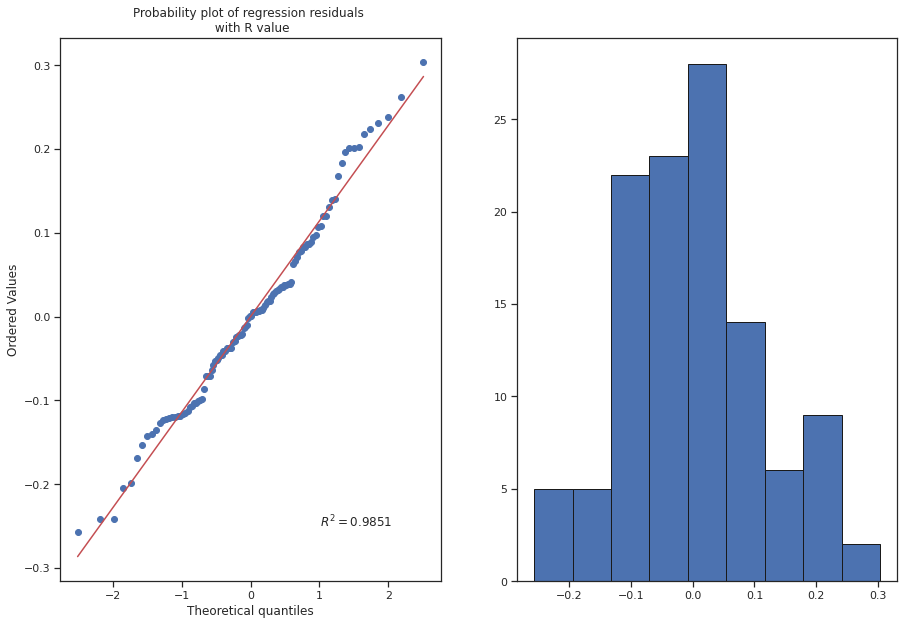

In [111]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf


fig = plt.figure(figsize= (15, 10))
ax = fig.add_subplot(121)


normality_plot, stat = stats.probplot(lm.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of regression residuals \n with R value")
ax.set

ax2 = fig.add_subplot(122)
plt.hist(lm.resid, bins='auto', histtype='bar', ec='k') 

plt.show()

In [112]:
sm.stats.anova_lm(lm, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(augmentation),2.0,0.106358,0.053179,3.652682,0.029439
C(feature_method),2.0,0.015040,0.007520,0.516528,0.598171
C(val_metric),1.0,0.107451,0.107451,7.380452,0.007771
C(augmentation):C(feature_method),4.0,0.030446,0.007611,0.522804,0.719172
C(feature_method):C(val_metric),2.0,0.007461,0.003730,0.256222,0.774477
C(augmentation):C(val_metric),2.0,0.041315,0.020658,1.418904,0.246808
Residual,100.0,1.455889,0.014559,NaN,NaN


Noneo of the interactions are significant.

### ANOVA of main effects

In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf


stats.shapiro(lm.resid)

In [ ]:
sm.stats.anova_lm(lm, type=2)

In [113]:
formula = "diff_mean_eel ~ C(augmentation) + C(feature_method) + C(val_metric)"
lm = ols(formula, lambdata).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          diff_mean_eel   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.220
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00949
Time:                        14:15:29   Log-Likelihood:                 83.774
No. Observations:                 114   AIC:                            -155.5
Df Residuals:                     108   BIC:                            -139.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.8582      0.052     16.386      0.000       0.754       0.962
C(augmentation)[T.aug0.5]     0.0645      0.027      2.358      0.020       0.010       0.119
C(augmentation)[T.aug0.7]     0.0651      0.027      2.380      0.019       0.011       0.119
C(feature_method)[T.mpt]     -0.0064      0.051     -0.125      0.901      -0.108       0.095
C(feature_method)[T.msd]      0.0171      0.051      0.333      0.740      -0.085       0.119
C(val_metric)[T.ndcg]        -0.0614      0.022     -2.749      0.007      -0.106      -0.017
==============================================================================
Omnibus:                        6.654   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.294
Skew:                           0.563   Prob(JB):                       0.0430
Kurtosis:                       3.235   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

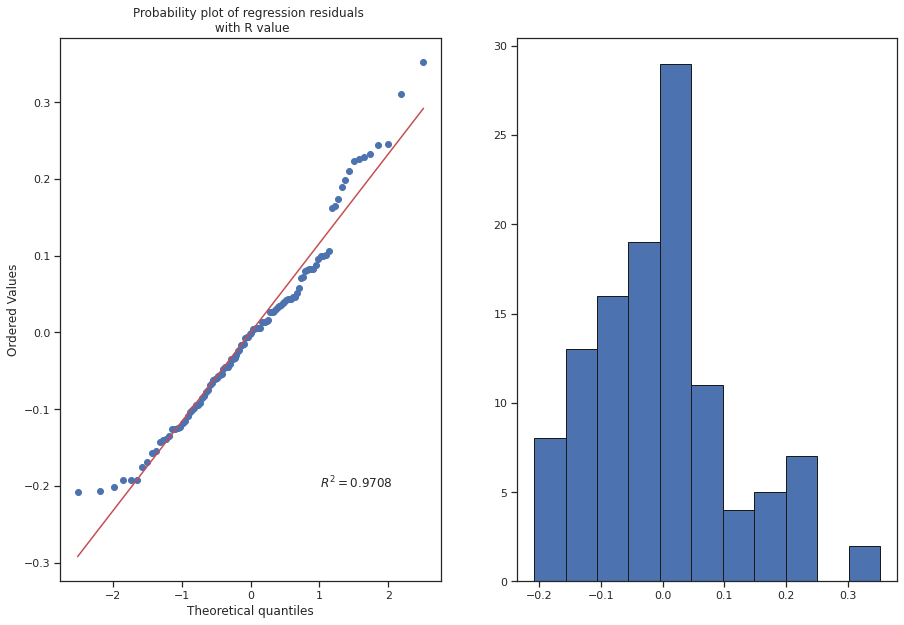

In [114]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf


fig = plt.figure(figsize= (15, 10))
ax = fig.add_subplot(121)


normality_plot, stat = stats.probplot(lm.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of regression residuals \n with R value")
ax.set

ax2 = fig.add_subplot(122)
plt.hist(lm.resid, bins='auto', histtype='bar', ec='k') 

plt.show()

In [115]:
sm.stats.anova_lm(lm, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(augmentation),2.0,0.106358,0.053179,3.741315,0.026852
C(feature_method),2.0,0.015040,0.007520,0.529061,0.590677
C(val_metric),1.0,0.107451,0.107451,7.559538,0.006999
Residual,108.0,1.535110,0.014214,NaN,NaN


The only main effect that has a significant effect on the mean eel is val_metric.

In [116]:
lambdata.groupby('val_metric').mean()

,diff_mean_eel,disp_mean_eel,rel_mean_eel,diff_mean_eel_ind,disp_mean_eel_ind,rel_mean_eel_ind,util_mean
val_metric,,,,,,,
err,0.906430,2.215435,1.201101,1.489527,1.269245,0.167532,0.258303
ndcg,0.845027,2.062093,1.155131,1.403513,1.252788,0.202310,0.303853


### MANOVA?

In [117]:
from statsmodels.multivariate.manova import MANOVA

In [118]:
formula = 'diff_mean_eel + disp_mean_eel + rel_mean_eel + util_mean ~ C(augmentation) + C(feature_method) + C(val_metric) + C(augmentation):C(feature_method) + C(feature_method):C(val_metric) + C(augmentation):C(val_metric) + C(augmentation):C(feature_method):C(val_metric)'
maov = MANOVA.from_formula(formula, data=lambdata)
print(maov.mv_test())

                               Multivariate linear model
                                                                                       
----------------------------------------------------------------------------------------
        Intercept               Value        Num DF   Den DF       F Value        Pr > F
----------------------------------------------------------------------------------------
           Wilks' lambda             0.0000  4.0000  93.0000  9298347512308.1621  0.0000
          Pillai's trace             1.0000  4.0000  93.0000  9298347512308.1621  0.0000
  Hotelling-Lawley trace  399928925260.5661  4.0000  93.0000  9298347512308.1621  0.0000
     Roy's greatest root  399928925260.5661  4.0000  93.0000  9298347512308.1621  0.0000
---------------------------------------------------------------------------------------
                                                                                       
--------------------------------------------------------

### LM baseline vs AC controller

In [119]:
lm_vs_ac = experiments[(experiments.ranker == 'ac') & (experiments.source == 'lm_mrfr_ndcg_noaug_nofeat') | ((experiments.augmentation == '-') & (experiments.feature_method == '-') & (experiments.val_metric == 'ndcg') & (experiments.ranker == 'lambdamart'))].reset_index(drop=True)
lm_vs_ac.head()    

,diff_mean_eel,disp_mean_eel,rel_mean_eel,diff_mean_eel_ind,disp_mean_eel_ind,rel_mean_eel_ind,util_mean,ranker,source,group,subgroup,theta,hfunc,augmentation,val_metric,feature_method,num_features,balancing_factor,ranker_config
0,0.445764,1.671848,1.159641,0.484084,0.285836,0.178548,0.282873,ac,lm_mrfr_ndcg_noaug_nofeat,author,ind,99.0,linear,-,-,-,-,-,ac_lm_mrfr_ndcg_noaug_nofeat_author_ind_99_linear
1,0.445764,1.671848,1.159641,0.484084,0.285836,0.178548,0.282873,ac,lm_mrfr_ndcg_noaug_nofeat,author,ind,99.0,max,-,-,-,-,-,ac_lm_mrfr_ndcg_noaug_nofeat_author_ind_99_max
2,0.382389,1.525435,1.118121,0.482273,0.275220,0.174146,0.291900,ac,lm_mrfr_ndcg_noaug_nofeat,author,ind,99.0,min,-,-,-,-,-,ac_lm_mrfr_ndcg_noaug_nofeat_author_ind_99_min
3,0.399379,1.596087,1.144953,0.449096,0.228490,0.167369,0.270091,ac,lm_mrfr_ndcg_noaug_nofeat,author,ind,9.0,linear,-,-,-,-,-,ac_lm_mrfr_ndcg_noaug_nofeat_author_ind_9_linear
4,0.398953,1.603008,1.148626,0.452797,0.229381,0.165964,0.268374,ac,lm_mrfr_ndcg_noaug_nofeat,author,ind,9.0,max,-,-,-,-,-,ac_lm_mrfr_ndcg_noaug_nofeat_author_ind_9_max


In [120]:
stats.ttest_ind(lm_vs_ac['diff_mean_eel'][lm_vs_ac.ranker == 'lambdamart'],
                lm_vs_ac['diff_mean_eel'][lm_vs_ac.ranker == 'ac'])

/home/pilmus/thesis/venv37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/pilmus/thesis/venv37/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [121]:
stats.ttest_rel([lm_vs_ac['diff_mean_eel'][lm_vs_ac.ranker == 'lambdamart'].mean()],
                [lm_vs_ac['diff_mean_eel'][lm_vs_ac.ranker == 'ac'].mean()])

Ttest_relResult(statistic=nan, pvalue=nan)

### ANCOVA

In [25]:
lambdata.dtypes

diff_mean_eel        float64
disp_mean_eel        float64
rel_mean_eel         float64
diff_mean_eel_ind    float64
disp_mean_eel_ind    float64
rel_mean_eel_ind     float64
util_mean            float64
ranker                object
source                object
group                 object
subgroup              object
theta                 object
hfunc                 object
augmentation          object
val_metric            object
feature_method        object
num_features          object
balancing_factor      object
ranker_config         object
dtype: object

#### Create dataframe

In [160]:
lambdata

,diff_mean_eel,disp_mean_eel,rel_mean_eel,diff_mean_eel_ind,disp_mean_eel_ind,rel_mean_eel_ind,util_mean,ranker,source,group,subgroup,theta,hfunc,augmentation,val_metric,feature_method,num_features,balancing_factor,ranker_config
0,0.962571,2.407325,1.268975,1.667653,1.307805,0.097748,0.147513,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10,0.1,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
1,0.848258,2.148359,1.196649,1.409798,1.259762,0.202654,0.307632,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10,0.5,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
2,0.759402,2.169259,1.251527,1.384659,1.251596,0.211141,0.318473,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10,0.9,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
3,0.973916,2.011828,1.065555,1.440966,1.265213,0.189796,0.285687,lambdamart,-,-,-,-,-,aug0.5,err,mpt,15,0.1,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
4,0.950073,2.281647,1.212385,1.489723,1.280177,0.172899,0.257938,lambdamart,-,-,-,-,-,aug0.5,err,mpt,15,0.5,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
5,0.854261,2.015334,1.127135,1.423912,1.269459,0.200446,0.296172,lambdamart,-,-,-,-,-,aug0.5,err,mpt,15,0.9,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
6,0.781035,2.017310,1.164736,1.419901,1.261337,0.198391,0.303458,lambdamart,-,-,-,-,-,aug0.5,err,mpt,20,0.1,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
7,0.999399,2.210436,1.152117,1.496742,1.267011,0.162807,0.269779,lambdamart,-,-,-,-,-,aug0.5,err,mpt,20,0.5,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
8,0.999399,2.210436,1.152117,1.496742,1.267011,0.162807,0.269779,lambdamart,-,-,-,-,-,aug0.5,err,mpt,20,0.9,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
9,0.966657,2.470155,1.298348,1.549057,1.275776,0.141032,0.217521,lambdamart,-,-,-,-,-,aug0.5,err,msd,10,0.1,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...


In [27]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'
df = pd.read_csv(url, index_col=0)
df.columns = df.columns.str.replace(".", "_")
df.head()

/home/pilmus/thesis/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [28]:
df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [29]:
maov = MANOVA.from_formula('Sepal_Length + Sepal_Width + \
                            Petal_Length + Petal_Width  ~ C(Species)', data=df)

In [30]:
print(maov.mv_test())


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       C(Species)        Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

In [31]:
import pandas as pd
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
df.head(2)

,plant_var,height,canopy_vol
0,A,20.0,0.7
1,A,22.0,0.8


In [32]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('height + canopy_vol ~ plant_var', data=df)
print(fit.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
         Pillai's trace  1.0365 6.0000 72.0000  12.9093 0.0000
 Hotelling-

In [122]:
ac = experiments[experiments.ranker == 'ac']
ac = ac.reset_index(drop=True)
ac.describe()

,diff_mean_eel,disp_mean_eel,rel_mean_eel,diff_mean_eel_ind,disp_mean_eel_ind,rel_mean_eel_ind,util_mean
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,0.440731,1.602267,1.127367,0.502547,0.265646,0.159222,0.258289
std,0.043454,0.065684,0.022361,0.043725,0.042268,0.011434,0.016220
min,0.338416,1.473831,1.079750,0.442360,0.181854,0.126087,0.216609
25%,0.415350,1.559410,1.110650,0.473351,0.227714,0.151641,0.247053
50%,0.432782,1.586949,1.122861,0.488403,0.271286,0.157593,0.255930
75%,0.455630,1.633754,1.143312,0.517487,0.287496,0.166766,0.269494
max,0.688543,1.907241,1.217784,0.691144,0.391324,0.188288,0.301110


In [123]:
experiments[experiments.ranker == 'lambdamart']

,diff_mean_eel,disp_mean_eel,rel_mean_eel,diff_mean_eel_ind,disp_mean_eel_ind,rel_mean_eel_ind,util_mean,ranker,source,group,subgroup,theta,hfunc,augmentation,val_metric,feature_method,num_features,balancing_factor,ranker_config
2784,0.962571,2.407325,1.268975,1.667653,1.307805,0.097748,0.147513,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10.0,0.1,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
2785,0.848258,2.148359,1.196649,1.409798,1.259762,0.202654,0.307632,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10.0,0.5,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
2786,0.759402,2.169259,1.251527,1.384659,1.251596,0.211141,0.318473,lambdamart,-,-,-,-,-,aug0.5,err,mpt,10.0,0.9,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
2787,0.973916,2.011828,1.065555,1.440966,1.265213,0.189796,0.285687,lambdamart,-,-,-,-,-,aug0.5,err,mpt,15.0,0.1,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
2788,0.950073,2.281647,1.212385,1.489723,1.280177,0.172899,0.257938,lambdamart,-,-,-,-,-,aug0.5,err,mpt,15.0,0.5,lambdamart_mrfr_train_90_10_split_aug0.5_lm_er...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0.621528,2.068255,1.269962,1.397432,1.255246,0.206579,0.303430,lambdamart,-,-,-,-,-,-,ndcg,msd,15.0,0.9,lambdamart_mrfr_train_90_10_split_lm_ndcg_msd_...
2894,0.674103,1.929473,1.174284,1.405275,1.260048,0.205059,0.272172,lambdamart,-,-,-,-,-,-,ndcg,msd,20.0,0.1,lambdamart_mrfr_train_90_10_split_lm_ndcg_msd_...
2895,0.728747,1.999800,1.182125,1.285395,1.227034,0.248492,0.373061,lambdamart,-,-,-,-,-,-,ndcg,msd,20.0,0.5,lambdamart_mrfr_train_90_10_split_lm_ndcg_msd_...
2896,0.639042,2.175565,1.314860,1.349589,1.237728,0.221742,0.348515,lambdamart,-,-,-,-,-,-,ndcg,msd,20.0,0.9,lambdamart_mrfr_train_90_10_split_lm_ndcg_msd_...


In [130]:
ac['temp_params'] = ac.source.apply(lambda x: x.split('_'))
ac.temp_params.apply(len).value_counts()

7    2592
5     144
2      48
Name: temp_params, dtype: int64

In [161]:
%debug

> /home/pilmus/thesis/venv37/lib/python3.7/site-packages/pandas/core/dtypes/cast.py(1221)construct_1d_arraylike_from_scalar()
   1219     else:
   1220         if not isinstance(dtype, (np.dtype, type(np.dtype))):
-> 1221             dtype = dtype.dtype
   1222 
   1223         if length and is_integer_dtype(dtype) and isna(value):

ipdb> dtype
<class 'object'>
ipdb> up
> /home/pilmus/thesis/venv37/lib/python3.7/site-packages/pandas/core/internals/construction.py(242)init_dict()
    240             else:
    241                 nan_dtype = dtype
--> 242             val = construct_1d_arraylike_from_scalar(np.nan, len(index), nan_dtype)
    243             arrays.loc[missing] = [val] * missing.sum()
    244 

ipdb> index
Index(['Wilks' lambda', 'Pillai's trace', 'Hotelling-Lawley trace', 'Roy's greatest root'], dtype='object')
ipdb> up
> /home/pilmus/thesis/venv37/lib/python3.7/site-packages/pandas/core/frame.py(410)__init__()
    408             )
    409         elif isinstance(data, 

In [125]:
blbl = ac.source.apply(lambda x: x.replace('lm_mrfr_','')).apply(lambda x: x.split('_'))
blbl[blbl.map(len) == 3]

432     [err, aug0.5, nofeat]
433     [err, aug0.5, nofeat]
434     [err, aug0.5, nofeat]
435     [err, aug0.5, nofeat]
436     [err, aug0.5, nofeat]
                ...          
2731    [ndcg, noaug, nofeat]
2732    [ndcg, noaug, nofeat]
2733    [ndcg, noaug, nofeat]
2734    [ndcg, noaug, nofeat]
2735    [ndcg, noaug, nofeat]
Name: source, Length: 144, dtype: object

In [126]:
blbl[blbl.map(len) == 5]

0       [err, aug0.5, mpt, 10, 0.1]
1       [err, aug0.5, mpt, 10, 0.1]
2       [err, aug0.5, mpt, 10, 0.1]
3       [err, aug0.5, mpt, 10, 0.1]
4       [err, aug0.5, mpt, 10, 0.1]
                   ...             
2707    [ndcg, noaug, msd, 20, 0.9]
2708    [ndcg, noaug, msd, 20, 0.9]
2709    [ndcg, noaug, msd, 20, 0.9]
2710    [ndcg, noaug, msd, 20, 0.9]
2711    [ndcg, noaug, msd, 20, 0.9]
Name: source, Length: 2592, dtype: object

In [127]:
blblbl = lambdata.ranker_config.apply(lambda x: x.replace('lambdamart_mrfr_train_90_10_split_','').replace('_random_state=0','').replace('_lm','').replace('lm_',''))

In [128]:
blblbl

0      aug0.5_err_mpt_10_0.1
1      aug0.5_err_mpt_10_0.5
2      aug0.5_err_mpt_10_0.9
3      aug0.5_err_mpt_15_0.1
4      aug0.5_err_mpt_15_0.5
               ...          
109          ndcg_msd_15_0.9
110          ndcg_msd_20_0.1
111          ndcg_msd_20_0.5
112          ndcg_msd_20_0.9
113              ndcg_nofeat
Name: ranker_config, Length: 114, dtype: object

In [131]:
ac.temp_params

0       [lm, mrfr, err, aug0.5, mpt, 10, 0.1]
1       [lm, mrfr, err, aug0.5, mpt, 10, 0.1]
2       [lm, mrfr, err, aug0.5, mpt, 10, 0.1]
3       [lm, mrfr, err, aug0.5, mpt, 10, 0.1]
4       [lm, mrfr, err, aug0.5, mpt, 10, 0.1]
                        ...                  
2779                            [TEXT, train]
2780                            [TEXT, train]
2781                            [TEXT, train]
2782                            [TEXT, train]
2783                            [TEXT, train]
Name: temp_params, Length: 2784, dtype: object

In [ ]:
def find_corresponding_input_covariates(params):
    if len(params == 7):
        ranker = 'lambdamart'
        val_metric = params[2]
        aug = params[3]
        fm = params[4]
        fn = params[5]
        bf = params[6]
        row = experiments[(experiments.ranker == ranker) & 
                           (experiments.val_metric == val_metric) & 
                           (experiments.augmentation == aug) &
                           (experiments.feature_method == fm) &
                           (experiments.num_features == fn) &
                           (experiments.balancing_factor = bf)].iloc[0]
        
    elif len(params == 5):
        ranker = 'lambdamart'
        val_metric = params[2]
        if 'noaug' in params:
            aug = '-'
        else:
            aug = params[3]
        fm = '-'
        fn = '-'
        bf = '-'
        row = experiments[(experiments.ranker == ranker) & 
                           (experiments.val_metric == val_metric) & 
                           (experiments.augmentation == aug) &
                           (experiments.feature_method == fm) &
                           (experiments.num_features == fn) &
                           (experiments.balancing_factor = bf)].iloc[0]
        
            
    elif len(params == 2):
        ranker = 'relevance_ranker'
        val_metric = '-'
        aug = '-'
        source = '_'.join(params)
    return row.diff_mean_eel, row.util_mean

['', 'bc']

In [150]:
for x, y in ac[(ac.temp_params.map(len) == 2)].iterrows():
    print(y.temp_params)

['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['META', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']
['TEXT', 'train']


In [35]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [57]:
import statsmodels.stats as sstats

In [59]:
stats

<module 'scipy.stats' from '/home/pilmus/thesis/venv37/lib/python3.7/site-packages/scipy/stats/__init__.py'>

In [51]:
lm_vs_ac['diff_mean_eel'][lm_vs_ac.ranker == 'ac']

0     0.445764
1     0.445764
2     0.382389
3     0.399379
4     0.398953
5     0.408219
6     0.445580
7     0.445580
8     0.432908
9     0.408936
10    0.407943
11    0.527881
12    0.446612
13    0.446612
14    0.379982
15    0.400182
16    0.399942
17    0.408253
18    0.434959
19    0.434959
20    0.387633
21    0.401243
22    0.401614
23    0.412557
Name: diff_mean_eel, dtype: float64

In [17]:
!pip freeze | grep pandas

pandas==1.3.0


In [153]:
stats.levene(
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == '-') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.5') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == '-') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == 'msd') & (lambdata['val_metric'] == 'ndcg')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'err')],
             lambdata['diff_mean_eel'][(lambdata['augmentation'] == 'aug0.7') & (lambdata['feature_method'] == 'mpt') & (lambdata['val_metric'] == 'ndcg')],
             
            )

LeveneResult(statistic=2.2266689161928648, pvalue=0.007687493371510872)

In [154]:
stats.levene(lambdata['diff_mean_eel'][lambdata['augmentation'] == '-'],
             lambdata['diff_mean_eel'][lambdata['augmentation'] == 'aug0.5'],
             lambdata['diff_mean_eel'][lambdata['augmentation'] == 'aug0.7'],)

LeveneResult(statistic=5.582145597810371, pvalue=0.004897989036159831)

In [161]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf


stats.shapiro(lm.resid)

(0.9850102663040161, 0.23522059619426727)

In [194]:
lambdata['EEL'][lambdata['val_metric'] == 'err'].mean()

0.9064291228070176